In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression # генерирует данные для регрессии
from sklearn.model_selection import train_test_split, KFold, cross_val_score # train_test_spliе - Для разделения на обучающую и тестовую выборку, cross_val_score - кросс-валидация
from numpy.linalg import inv, qr
import random
import pandas as pd

Машинное обучение

Требуется подогнать заданный набор точек данных под соответсвующую функцию (Отображение входа на выход), которая улавливает важные сигналы в данных, которые не улавливаются человеком, и игнорирует помехи, а затем убедиться, что на новых данных функция работает хорошо.

Машинное обучение можно заделить на два больших раздела:
1. Обучение с учителем (supervised learning)
2. Обучение без учителя (unsupervised learning)

Обучение с учителем (ОчУ) - моделирует отношение между признаками и метками. Такие модели служат для пердсказания меток на основе обучающих данных маркированных. После построения модели можно использовать её для присвоения меток новым, ранее неизвестным данным. 

В рамках ОчУ есть две задачи:
1. Задачи классификации (метки - дискретные, их можно посчитать)
2. Задачи регрессии (метки/результат - непрерывные величины, чаще всего действительные числа)

Обучение без учителя (Обу) - моделирование признаков без меток. Такие модели служат для выявления структуры немакркированных данных.

Врамках ОбУ есть две свои две задачи:
1. Задача кластеризации (Выделяет отдельные группы данных)
2. Понижения размерности (Поиск более сжатого представления данных)

Существуют методы частичного обучения (semi-supervised learning) - характеризуется тем, что метрики (метки) они не полные, то есть не все данные промаркированы.

Методы обучения с подкреплением (reinforcement learning) - система обучения улучшает свои характеристики на основе взаимодействия (обратной связи) со средой, то есть мы из вне можем сказать, что хорошо получилось, а что плохо. При этом система получает сигналы (функции наград), которые несут в себе информацию насколько хорошо/плохо система решила задачу (с точки зрения среды). Это продолжается, пока итоговая награда не станет максимальной.

In [10]:
iris = sns.load_dataset('iris')

print(iris.head())
print(type(iris))

print(type(iris.values))

print(iris.values.shape)

print(iris.columns)

print(iris.index)

# строки - отдельные объекты - образцы (sample)
# столбцы - признаки (features) - соответсвуют конкретным наблюдениям
# Матрицы признаков (features matrix) размер [число образцов * число признаков]
# Целевой массив, массив меток (targets) - одномерный массив [1 * число образцов] - данные, которые мы хотим предсказать на основе имеющихся
# Зависимые (метка) и независимые переменные (Признаки)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)


Процесс построения системы машинного обучения:
1. Предварительная обработка данных
1.1 На вход поступают необработанные данные и метки
1.2 Происходит выбор признаков, маштабирование признаков
1.3 Понижение размерности
1.4 Выборка образцов
1.5 На выход поступает набор данных (обычно делится на обучающтий и тестовый наборы)

2. Обучение модели
2.1 Выбор модели
2.2 Перекрестная проверка
2.3 Метрики эффективности
2.4 Оптимизация гиперпараметров (Параметры, которые получаеются не из данных, а являются характеристиками модели, например на сколько групп делить при кластеризации)

3. Оценка и формирование финальной модели

4. Прогнозироание (применение модели)


SciKit-learn

1. Выбираем класс модели
2. Устанавливаем гиперпараметры модели
3. Создаем матрицу признаков и целевой массив
4. Обучение модели fit()
5. Применяем модель к новым данным
- predict() (с учителем)
- predict() или transform() (без учителя)

ОБУЧЕНИЕ С УЧИТЕЛЕМ: Линейная регрессия

(50,)
(50,)
2.0272088103606944
0.001422914446798984


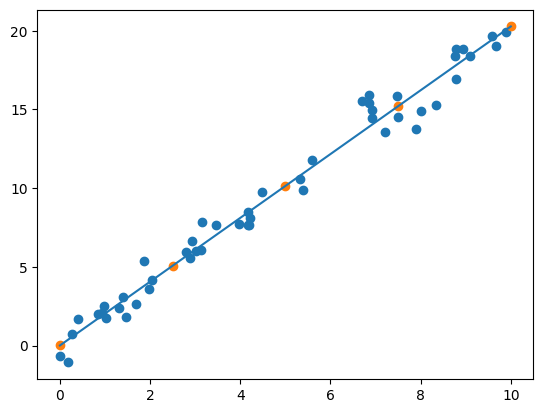

In [11]:
## Простая линейная регрессия

# Пусть у нас есть набор точек и мы хотим апроксимировать их прямой
# y = ax + b (x- признак, y - метка) 
# a = coef_, b = intercept_

# 1-й этап
np.random.seed(1)
x = 10 * np.random.rand(50)

y = 2 * x + np.random.randn(50)

plt.scatter(x, y)

## 2-й этап
# Класс модели - LinearRegression
# Гиперпараметры
model = LinearRegression()

# Создаем матрицу признаков и целевой массив

print(x.shape)
print(y.shape)

X = x[:, np.newaxis]

# Обучение модели fit()
model.fit(X, y) # Требует второе измерение

print(model.coef_[0])
print(model.intercept_)

x = np.linspace(0, 10, 30)
y = model.coef_[0] * x + model.intercept_

plt.plot(x, y)

# Применить модель к новым данным

xfit = np.linspace(0, 10, 5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(xfit, yfit) # Выводим наши точки

plt.show()



In [12]:
# Линейная регрессия

# Задача: на основе наблюдаемых точек построить прямую (в общем случае гиперплоскость), которая отображает связь между двумя или более переменными.abs
# Регрессия пытается подогнать некоторую функцию к наблюдаемым данным, чтобы спрогнозировать новые данные
# Линейная регрессия подгоняет данные к прямой линии, пытаемся установать линейную связб между переменными и предсказать новые данные

(100, 1)
(100,)


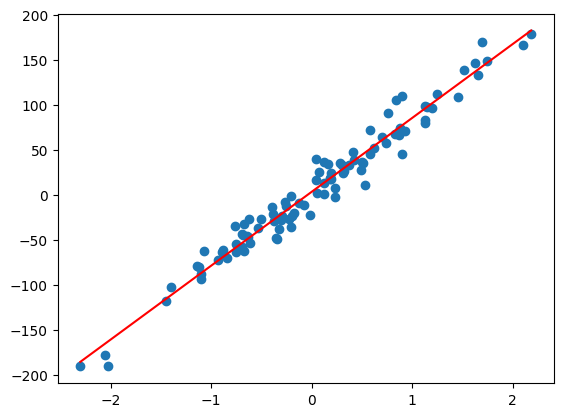

In [13]:
features, target = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, random_state=1)

print(features.shape)

print(target.shape)

model = LinearRegression().fit(features, target)

plt.scatter(features, target)

x = np.linspace(features.min(), features.max(), 100)

# y = kx + b
plt.plot(x, model.coef_[0] * x + model.intercept_, color='red')

plt.show()

Для простоты, будем рассматривать простую линейную регрессию
Линейная -> линейная зависимость между величинами

+ прогнозирование на новых данных, если мы все норм построили
+ анализ взаимного лвияния переменных друг на друга

- точки обучаемых данных НЕ будут точно лежать на прямой (шум) -> возникает область погрешности
- Не позволяет делать прогнозы вне диапазона имеющихся данных

Данные, на основании которых разрабатывается модель - это выборка из совокупности, хотелось бы, чтобы это была репрезентативная выборка.


Разберем, что необходимо делать для построения интересующей нас линии:
1. Определяем остатки (отклонения, ошибки) - расстояние между точками данных и ближайшими(по вертикали) точками на прямой.
2. Далее задача состоит в минимизации остатка. Чем меньше остатки(ошибки), тем меньше разрыв между прогнозной прямой и фактическими точками
3. Критерием для определения суммарного остатка используют сумму квадратов всех остатков. Модуль не подходит, так как в расчетах модели испольуется производная, а у модуля в нуле её нет. 
4. Обучение модели сводится тем самым к минимизации функции потерь.

Вообще все решения можно разить на две группы:
1. Численные - проще и доступнее, но зачастую требуют большой вычислительной мощности, также иногда дают неточные решения
2. Аналитические - точные (надежные), но иногда их получить либо очень сложно, либо невозможно

Для линейной регрессии есть аналитическое решение и коэффициенты в y=kx+b можно найти по определенным формулам

In [ ]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 15],
        [7, 18],
        [8, 19],
        [9, 24],
        [10, 27],
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)
# y = w_0 + w_1 * x
w_1 = (n * sum(x[i] *y[i] for i in range(n)) - sum(x[i] for i in range(n)) * sum(y[i] for i in range(n))) / (n * sum(x[i] ** 2 for i in range(n)) - sum(x[i] for i in range(n)) ** 2)
w_0 = sum(y[i] for i in range(n)) / n - w_1 * sum(x[i] for i in range(n)) / n

print(w_1, w_0)

2.4545454545454546 0.8000000000000007


In [20]:
# Второй метод аналитического решения - метод обратных матриц

data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 15],
        [7, 18],
        [8, 19],
        [9, 24],
        [10, 27],
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)

x_1 = np.vstack([x, np.ones(len(x))]).T

w = inv(x_1.transpose() @ x_1) @ (x_1.transpose() @ y)
print(w)

[2.45454545 0.8       ]


In [ ]:
# Третий метод - разложение матриц
# Хорош при приближенных вычислениях - минимизирует ошибку вычислений, появляющуюся из-за вычислений компьютера
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 15],
        [7, 18],
        [8, 19],
        [9, 24],
        [10, 27],
    ]
)

x = data[:, 0]
y = data[:, 1]
n = len(x)

Q,R = qr(x_1)

w = inv(R).dot(Q.transpose()).dot(y)

print(w)

[2.45454545 0.8       ]


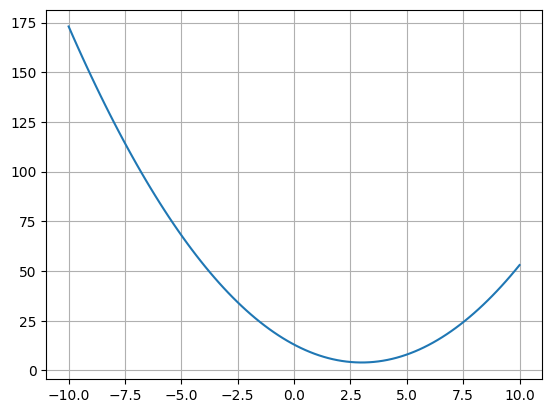

In [30]:
# Четвертый метод - градиентный спуск
# Метод оптимизации, где используется производные и итерации
# Так как у нас два параметра w_0 и w_1 нам над рассматривать частные производные. Это позволяет определить угловой коэф и изменение параметра выполняется условно, где он максимальный или минимальный
# Для больших угловых коэф делается более широкий шаг, для маленьких более узкий
# Ширина шага вычисляется как доля от углового коэф -> связано напрямую скорости обучения
# Чем выше скорость, тем быстрее работает система (Но возможно снижение точности). Чем ниже скорость, тем дольше обучение, но точнее результат

def f(x):
    return (x - 3) ** 2 + 4

x = np.linspace(-10, 10, 100)

ax = plt.gca()

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

plt.plot(x, f(x))

plt.grid()
plt.show()


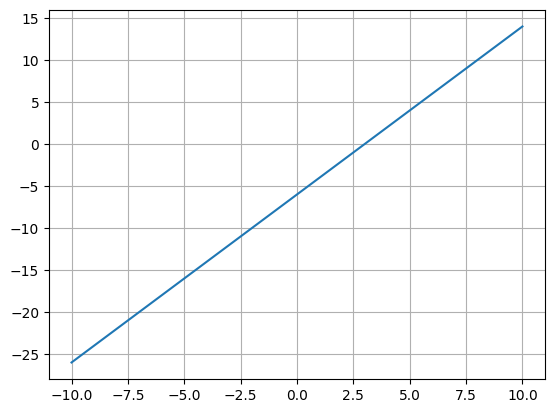

In [29]:
def dx_f(x):
    return 2 * x - 6

x = np.linspace(-10, 10, 100)

ax = plt.gca()


plt.plot(x, dx_f(x))
plt.grid()
plt.show()


In [ ]:
# Поиск минимума через производную

L = 0.001 # По сути это наш шаг
iterations = 100_000

x = random.randint(0, 5)

for i in range(iterations):
    d_x = dx_f(x)
    x -= L * d_x

print(x, f(x))

2.999999999999889 4.0


In [38]:
# пример реализации метода
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 15],
        [7, 18],
        [8, 19],
        [9, 24],
        [10, 27],
    ]
)

x = data[:, 0]
y = data[:, 1]
n = len(x)
w1 = 0.0
w0 = 0.0
L = 0.001
iterations = 100_000

for i in range(iterations):
    D_w0 = 2 * sum((-y[i] + w0 + w1 * x[i]) for i in range(n) )
    D_w1 = 2 * sum((x[i] * (-y[i] + w0 + w1 * x[i])) for i in range(n))
    w1 -= L * D_w1
    w0 -= L * D_w0


print(w1, w0)

2.4545454545454577 0.7999999999999804


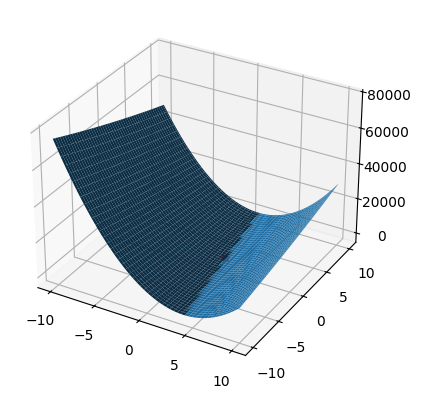

In [37]:
# Функция потерь

w1 = np.linspace(-10, 10, 100)
w0 = np.linspace(-10, 10, 100)


def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x[i])) ** 2 for i in range (len(x)))


W1, W0 = np.meshgrid(w1, w0)

EW = E(W1, W0, x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(W1 , W0, EW)

w1_fit = 2.4
w0_fit = 0.8

E_fit = E(w1_fit, w0_fit, x, y)

ax.scatter3D(w1_fit, w0_fit, E_fit, color='red')

plt.show()

Переобучение и дисперсия

Нет гарантий, что линейная регрессия будет оптимальной, при минимизации суммы квадратов.
Цель состоит не в минимизации суммы квадратов, а в том чтобы делать "правильные" предсказания на новых данных.

Переобучение очень чувствительно к выбросам (Находятся далеко от остальных точек)

Поэтому к моделям специально добавляется смещение
Смещение модели означает, что при попытке построить модель, предпочтение отдается определенной схеме (наприме, прямая линия).

Если в модель добавить смещение, то есть риск недообучения.

Поэтому необходимо балансировать между разными показателями: минимизация Функции потер -> перобучение; добавсление смещения -> недообучение.


2 вида добавления смещения к регрессии:
1. Гребневая регрессия (ridge) - Добавляется смещение в виде некоторого штрафа, из-за этого хуже идет подгонка под имеющиеся данные
2. Лассо - регрессия - удаление некоторых переменных (влияние которых минимально), тем самым снижается размерность и вносится смещение 

Механически применить линейную регрессию к данным, сделать на основе полученной модели прогноз, и думать что все в порядке НЕЛЬЗЯ. Всегда необходимо анализировать модель на недообучение и переобучение.


In [ ]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 15],
        [7, 18],
        [8, 19],
        [9, 24],
        [10, 27],
    ]
)

# Градиентный спуск - пакетный градиентный спуск. Для работы используются ВСЕ доступные обучающие данные
# На практике чаще используется Стохастический (вероятностный) градиентный спуск, на каждой итерации мы обучаемся только по одной выборке из данных
# - сокращение числа вычислений
# - вносим смещение, боримся с переобучением
# Мини-пакутный градиентный спуск, на каждой итерации используется несколько выборок

x = data[:, 0]
y = data[:, 1]
n = len(x)
w1 = 0.0
w0 = 0.0
L = 0.001
iterations = 100_000

# Размер выборки
sample_size = 1


for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace=False)
    D_w0 = 2 * sum(-y[idx] + w0 + w1 * x[idx])
    D_w1 = 2 * sum(x[idx] * (-y[idx] + w0 + w1 * x[idx]))
    w1 -= L * D_w1
    w0 -= L * D_w0


print(w1, w0)

2.4788875906304924 0.7598515664069875


Далее надо понять, как оценить насколько сильно "промахиваются" прогнозы при использовании линейной регрессии
Для оценки степени взаимосвязи двух переменных мы использовали линейный коэф корреляции 

In [ ]:
data_df = pd.DataFrame(data)
print(data_df.corr(method='pearson')) # положительное значение говорит о прямой линейной зависимости, отрицательное об обратном


data_df[1] = data_df[1].values[::-1]
print(data_df.corr(method='pearson'))

# Коэф корреляции помогает понять, есть ли связь между двумя переменными.


          0         1
0  1.000000  0.983273
1  0.983273  1.000000
          0         1
0  1.000000 -0.983273
1 -0.983273  1.000000


Обучающие и тестовые выборки, по сути является основным методом борьбы с переобучением
Заключается в том, что набор данных делится на обучающуюся и тестовую выборку

Во всех видах машинного обучения с учителем это встречается

Делят обычно в пропорции 2/3 на обучение и 1/3 на тест. (но это все произвольно, нет четких критериев)



In [ ]:
data_df = pd.DataFrame(data)
 
X = data_df.values[:,:-1]
Y = data_df.values[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)

model = LinearRegression()
model.fit(X_train, Y_train)

r = model.score(X_test, Y_test) # Коэф детерминации, вообще r^2, чем он ближе к 1, тем лучше регрессия работает на тестовых данных
print(r)

0.9503961185679437


Перекрестная валидация, можель обучается несколько раз и несколько раз тестируется

In [ ]:
kfold = KFold(n_splits=3, random_state=1, shuffle=True) # 3-х кратная перекрестная валидация

model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold) # Результатом будет средне квадратические модели

print(results)
print(results.mean(),results.std()) 



[ 0.93640905 -1.78864446  0.90456743]
0.01744400477805985 1.2771635608126135


Метрик показывают насколько ЕДИНООБРАЗНО ведет себя модель на разных выборках
Возможна использования поэлементной перекрестной валидации - мало данных
Слачайную валидацию

Иногда часть резервируют для Валидационной выборке, когда две модели просчитали на своих тестовых и обучающих выборках и потом их сравнили еще и на новых общих данных (Для сравнения различных моделей)



   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77
[2.00672647 3.00203798] 20.109432820035963


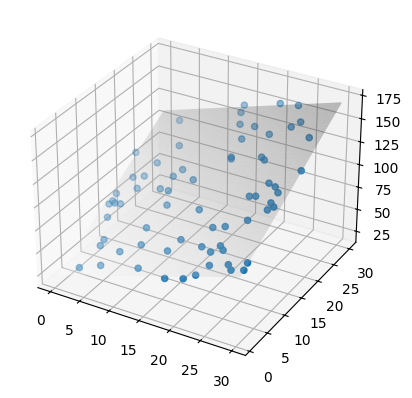

In [65]:
data_df = pd.read_csv('multiple_independent_variable_linear.csv')
print(data_df.head())

X = data_df.values[:,:-1]
Y = data_df.values[:,-1]

model = LinearRegression().fit(X, Y)

print(model.coef_, model.intercept_)

x1 = X[:, 0]
x2 = X[:, 1]
y = Y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)

X1_, X2_ = np.meshgrid(x1_, x2_)

Y_ = model.intercept_ + model.coef_[0] * X1_ + model.coef_[1] * X2_

ax.plot_surface(X1_, X2_, Y_, cmap='Greys', alpha=0.25)

plt.show()